## Step 1 : Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',500)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
lead_score = pd.read_csv("C:\\Users\\USER\\Desktop\\IIT-B\\Machine Learning\\Group case Study\\Lead Scoring Assignment\\Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_score.shape

(9240, 37)

In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2 : Data Cleaning and EDA

In [6]:
# As we can observe that there are select values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
lead_score = lead_score.replace('Select', np.nan)

In [7]:
# Checking for null vales in the columns
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# percentage of null values present in each column
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
lead_score = lead_score.drop('Prospect ID',axis = 1)
lead_score.shape

(9240, 36)

In [10]:
# Deleting the columns 'What matters most to you in choosing a course' 
# as it mostly has unique values and some null values.
lead_score = lead_score.drop('What matters most to you in choosing a course' , axis = 1)
lead_score.shape

(9240, 35)

In [11]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
lead_score = lead_score.drop('How did you hear about X Education' , axis = 1)
lead_score.shape

(9240, 34)

In [12]:
# Deleting the columns 'Lead Profile'
lead_score = lead_score.drop('Lead Profile' , axis = 1)
lead_score.shape

(9240, 33)

#### Null Values Imputation In Each Column

In [13]:
# Let's take care of null values in each column
# Lead Quality: Indicates the quality of lead based on the data and 
# intuition the the employee who has been assigned to the lead
lead_score['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

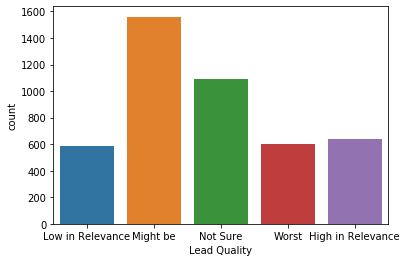

In [14]:
sns.countplot(lead_score['Lead Quality'])

In [15]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
lead_score['Lead Quality'] = lead_score['Lead Quality'].replace(np.nan, 'Not Sure')

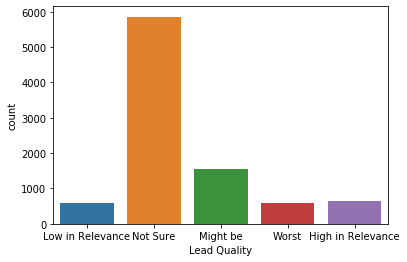

In [16]:
sns.countplot(lead_score['Lead Quality'])

 Now let's consider below columns 
 Asymmetrique Activity Index  
 Asymmetrique Profile Index      
 Asymmetrique Activity Score      
 Asymmetrique Profile Score  
 An index and score assigned to each customer based on their activity and their profile

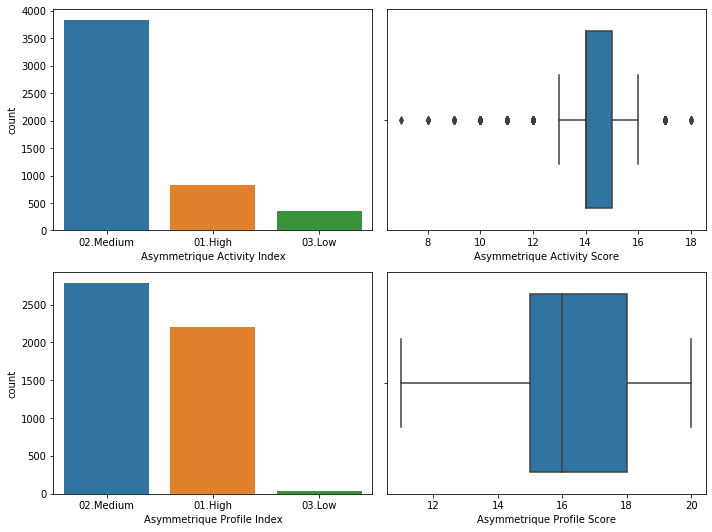

In [17]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_score['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead_score['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_score['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead_score['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

1. There is too much variation in thes parameters so its not reliable to impute any value in it. 
2. 45% null values means we need to drop these columns.

In [18]:
# dropping Asymmetrique Activity Index,Asymmetrique Activity Score,Asymmetrique Profile Index,Asymmetrique Profile Score
lead_score = lead_score.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [19]:
# Checking for null values 
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


#### Analysis of Categorical Variables

In [20]:
# City
lead_score['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Thane & Outskirts'),
 Text(0, 0, 'Other Metro Cities'),
 Text(0, 0, 'Other Cities'),
 Text(0, 0, 'Other Cities of Maharashtra'),
 Text(0, 0, 'Tier II Cities')]

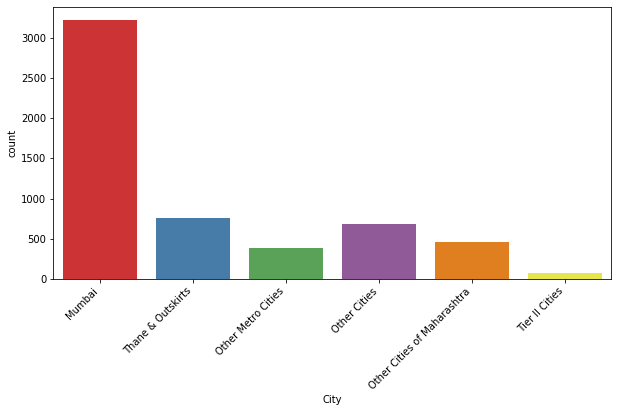

In [21]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=lead_score,
    x = lead_score.City,
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1. Around 60% of the data is Mumbai so we can impute Mumbai in the missing values.

In [22]:
lead_score['City'] = lead_score['City'].replace(np.nan,'Mumbai')

In [23]:
# Specialization
lead_score.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

[Text(0, 0, 'Business Administration'),
 Text(0, 0, 'Media and Advertising'),
 Text(0, 0, 'Supply Chain Management'),
 Text(0, 0, 'IT Projects Management'),
 Text(0, 0, 'Finance Management'),
 Text(0, 0, 'Travel and Tourism'),
 Text(0, 0, 'Human Resource Management'),
 Text(0, 0, 'Marketing Management'),
 Text(0, 0, 'Banking, Investment And Insurance'),
 Text(0, 0, 'International Business'),
 Text(0, 0, 'E-COMMERCE'),
 Text(0, 0, 'Operations Management'),
 Text(0, 0, 'Retail Management'),
 Text(0, 0, 'Services Excellence'),
 Text(0, 0, 'Hospitality Management'),
 Text(0, 0, 'Rural and Agribusiness'),
 Text(0, 0, 'Healthcare Management'),
 Text(0, 0, 'E-Business')]

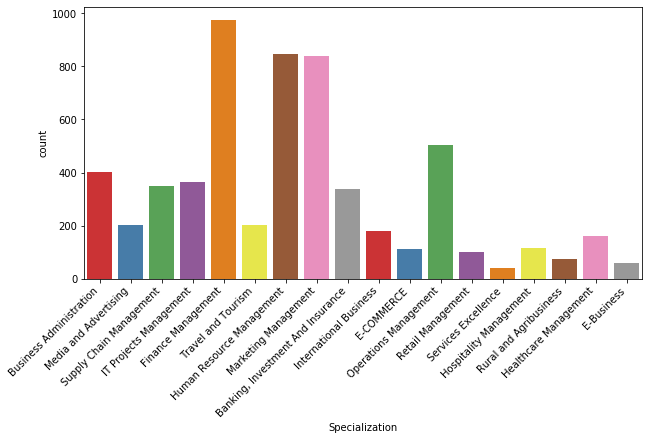

In [24]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=lead_score,
    x = lead_score.Specialization,
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1. It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,may not have any specialization or is a student.
2. Hence we can make a category "Others" for missing values. 

In [25]:
lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan, 'Others')

In [26]:
# checking for null values 
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2) 

Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                               0.00
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [27]:
# Tags
lead_score.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

[Text(0, 0, 'Interested in other courses'),
 Text(0, 0, 'Ringing'),
 Text(0, 0, 'Will revert after reading the email'),
 Text(0, 0, 'Lost to EINS'),
 Text(0, 0, 'In confusion whether part time or DLP'),
 Text(0, 0, 'Busy'),
 Text(0, 0, 'switched off'),
 Text(0, 0, 'in touch with EINS'),
 Text(0, 0, 'Already a student'),
 Text(0, 0, 'Diploma holder (Not Eligible)'),
 Text(0, 0, 'Graduation in progress'),
 Text(0, 0, 'Closed by Horizzon'),
 Text(0, 0, 'number not provided'),
 Text(0, 0, 'opp hangup'),
 Text(0, 0, 'Not doing further education'),
 Text(0, 0, 'invalid number'),
 Text(0, 0, 'wrong number given'),
 Text(0, 0, 'Interested  in full time MBA'),
 Text(0, 0, 'Still Thinking'),
 Text(0, 0, 'Lost to Others'),
 Text(0, 0, 'Shall take in the next coming month'),
 Text(0, 0, 'Lateral student'),
 Text(0, 0, 'Interested in Next batch'),
 Text(0, 0, 'Recognition issue (DEC approval)'),
 Text(0, 0, 'Want to take admission but has financial problems'),
 Text(0, 0, 'University not recognized

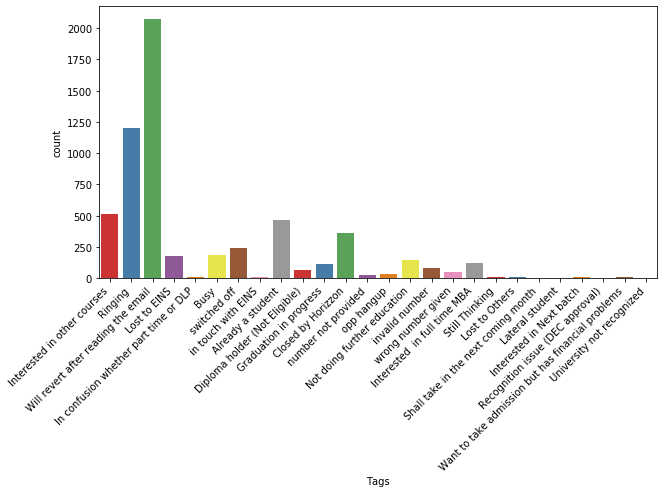

In [28]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=lead_score,
    x = lead_score.Tags,
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1. Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [29]:
lead_score.Tags = lead_score.Tags.replace(np.nan,'Will revert after reading the email')

In [30]:
# What is your current occupation
lead_score['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

[Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Working Professional'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Housewife')]

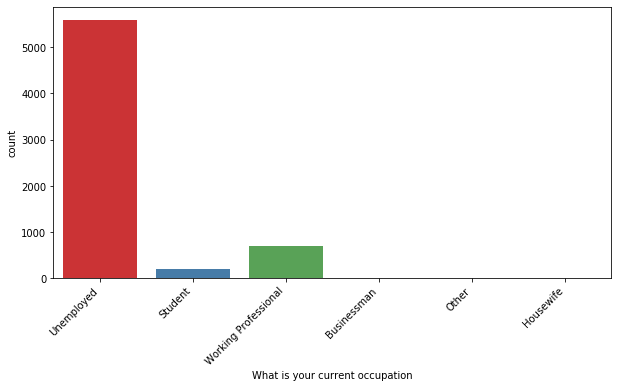

In [31]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=lead_score,
    x = lead_score['What is your current occupation'],
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1. 86% entries are of Unemployed so we can impute "Unemployed" in it.

In [32]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan,'Unemployed')

In [33]:
# Country
lead_score.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

[Text(0, 0, 'India'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Kuwait'),
 Text(0, 0, 'Oman'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Qatar'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Sri Lanka'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Asia/Pacific Region'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Tanzania'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Liberia'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Indonesia')]

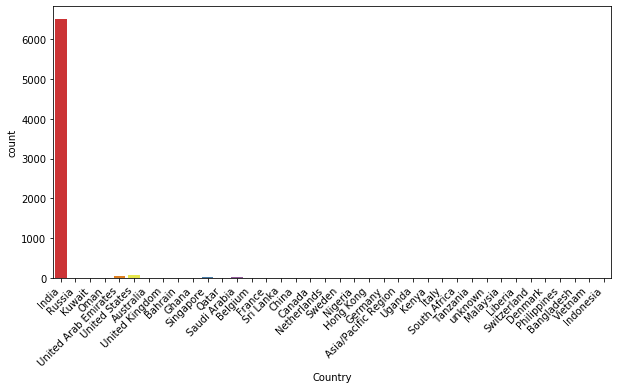

In [34]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=lead_score,
    x = lead_score.Country,
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

1. Country is India for most values so let's impute the same in missing values.

In [35]:
lead_score['Country'] = lead_score['Country'].replace(np.nan,'India')

In [36]:
# checking for null values
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

1. around 2% data has null values.
2. As they are small they can be ignored, instead of loosing the columns.

In [37]:
lead_score.dropna(inplace = True)

In [38]:
round(100*(lead_score.isnull().sum()/len(lead_score.index)), 2)

Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### Exploratory Data Analysis

### Univariate Analysis

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [39]:
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

37.85541106458012

In [40]:
lead_score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


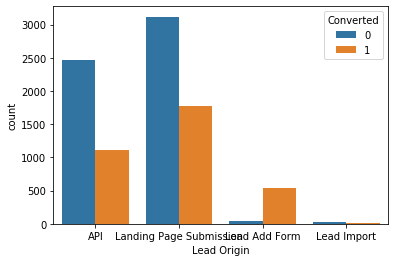

In [41]:
# Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_score)
#xticks(rotation = 90)

1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.
4. To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

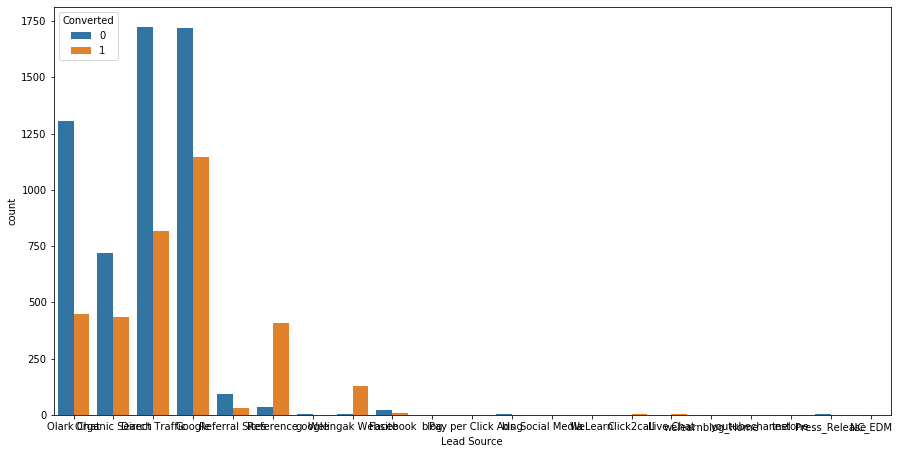

In [42]:
# Lead Source
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score)
#xticks(rotation = 90)

In [43]:
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['google'], 'Google')
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

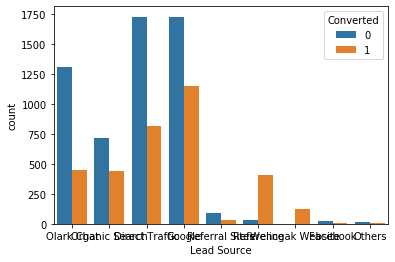

In [44]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_score)
#xticks(rotation = 90)

1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

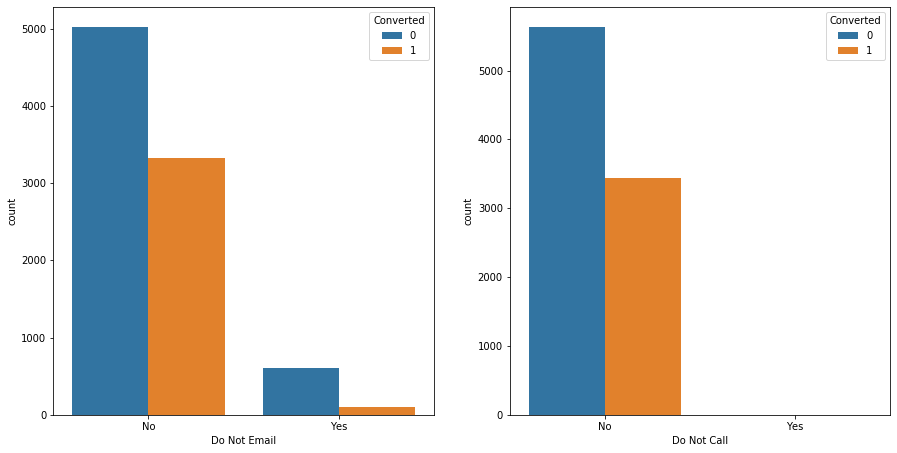

In [45]:
# Do Not Email & Do Not Call
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_score, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_score, ax = axs[1])

In [46]:
# Total Visits
lead_score['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

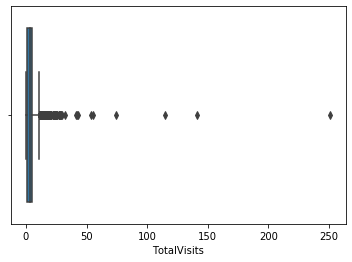

In [47]:
sns.boxplot(lead_score['TotalVisits'])

1. As we can see there are a number of outliers in the data.
2. We will consider data from 5% till 95% value for analysis.

In [48]:
#Q1 = lead_score['TotalVisits'].quantile(0.05)
#Q3 = lead_score['TotalVisits'].quantile(0.95)
#lead_score['TotalVisits'] = lead_score[(lead_score['TotalVisits']>= Q1) & (lead_score['TotalVisits']<= Q3)]
#sns.boxplot(lead_score['TotalVisits'])

In [49]:
percentiles = lead_score['TotalVisits'].quantile([0.05,0.95]).values
lead_score['TotalVisits'][lead_score['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_score['TotalVisits'][lead_score['TotalVisits'] >= percentiles[1]] = percentiles[1]

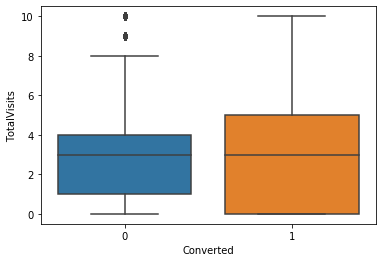

In [50]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_score)

1. Median for converted and not converted leads are the same.
2. Nothng conclusive can be said on the basis of Total Visits.

In [51]:
# Total time spent on website
lead_score['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

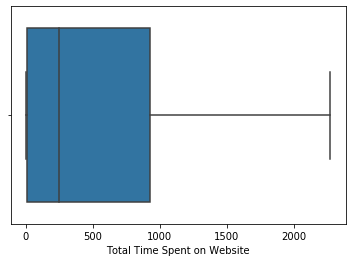

In [52]:
sns.boxplot(lead_score['Total Time Spent on Website'])

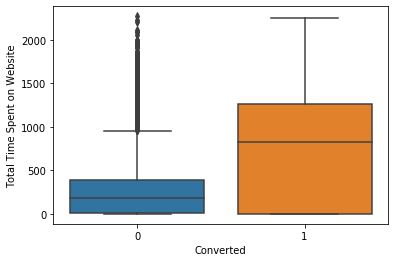

In [53]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_score)

1. Leads spending more time on the weblise are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

In [54]:
# Page views per visit
lead_score['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

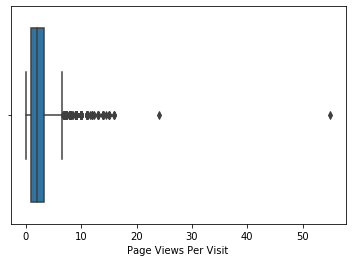

In [55]:
sns.boxplot(lead_score['Page Views Per Visit'])

1. As we can see there are a number of outliers in the data.
2. We will consider data from 5% till 95% value for analysis.

In [56]:
percentiles = lead_score['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_score['Page Views Per Visit'][lead_score['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

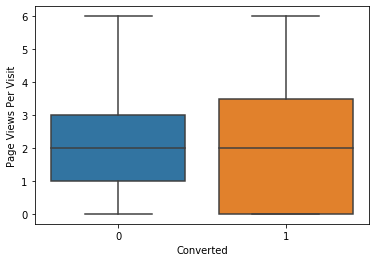

In [57]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_score)

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

In [58]:
# Last Activity
lead_score['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

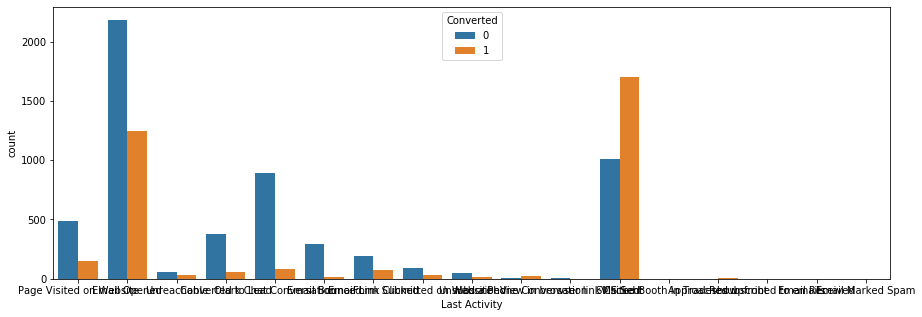

In [59]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)

In [60]:
# # Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

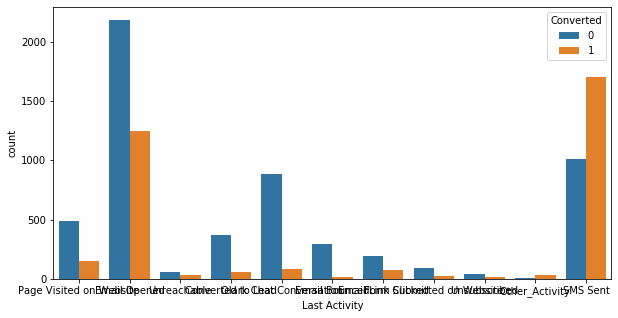

In [61]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_score)

1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.

In [62]:
# Country
lead_score.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

1. Most values are 'India' no such inference can be drawn.

In [63]:
# Specialization
lead_score.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [64]:
lead_score['Specialization'] = lead_score['Specialization'].replace(['Others'], 'Other_Specialization')

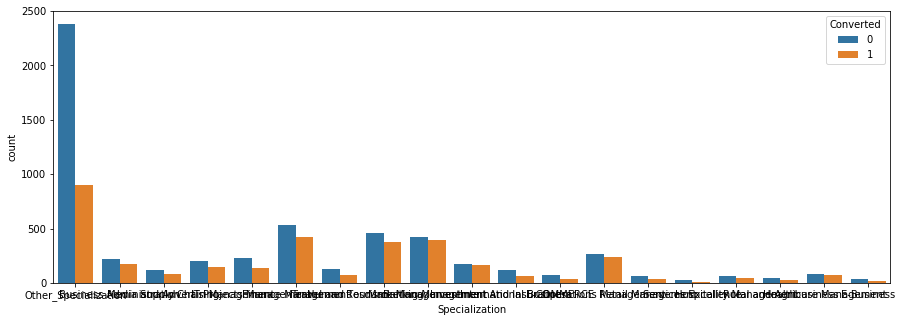

In [65]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_score)

1.Focus should be more on the Specialization with high conversion rate.

In [66]:
# Occupation
lead_score['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [67]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Other'], 'Other_Occupation')

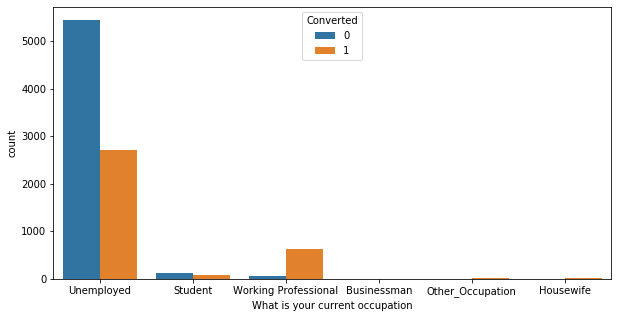

In [68]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_score)

1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

In [69]:
# Search
lead_score.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

1. Most entries are 'No'. No Inference can be drawn with this parameter.

In [70]:
# Magazine
lead_score.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [71]:
# Newspaper Article
lead_score['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

1. Most entries are 'No'. No Inference can be drawn with this parameter.

In [72]:
# X Education Forums
lead_score['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [73]:
# Newspaper
lead_score.Newspaper.describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [74]:
# Digital Advertisement
lead_score['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter

In [75]:
# Through Recommendations
lead_score['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [76]:
# Receive More Updates About Our Courses
lead_score['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter

In [77]:
# Tags
lead_score.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

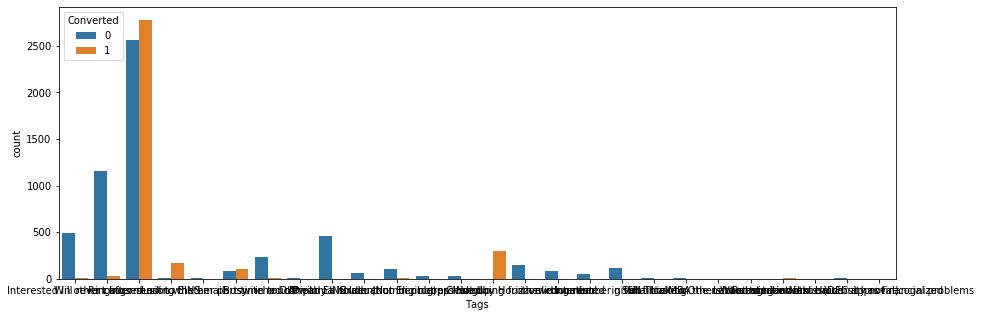

In [78]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)

In [79]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_score['Tags'] = lead_score['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

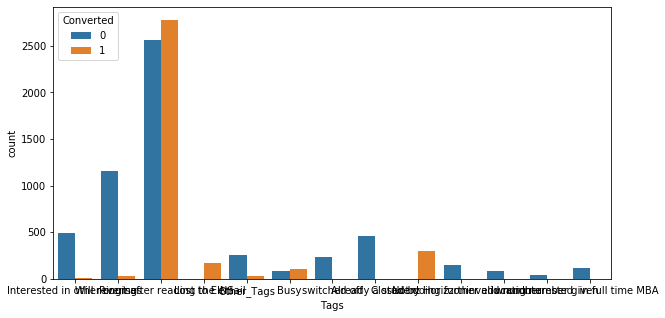

In [80]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_score)

In [81]:
# Lead Quality
lead_score['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

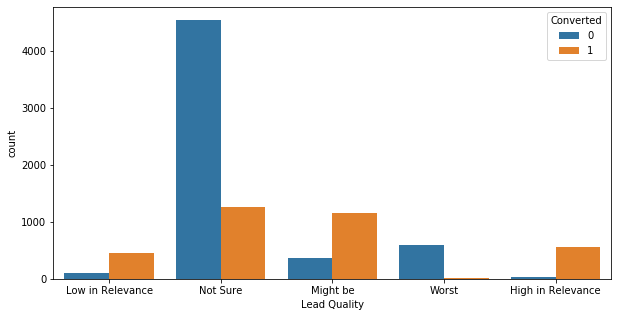

In [82]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_score)

In [83]:
# Update me on Supply Chain Content
lead_score['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [84]:
# Get updates on DM Content
lead_score['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [85]:
# I agree to pay the amount through cheque
lead_score['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [86]:
# A free copy of Mastering The Interview
lead_score['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

Most entries are 'No'. No Inference can be drawn with this parameter.

In [87]:
# City
lead_score.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

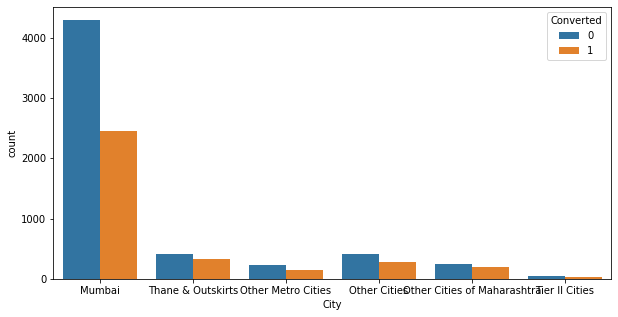

In [88]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead_score)

Most leads are from mumbai with around 30% conversion rate.

In [89]:
# Last Notable Activity
lead_score['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

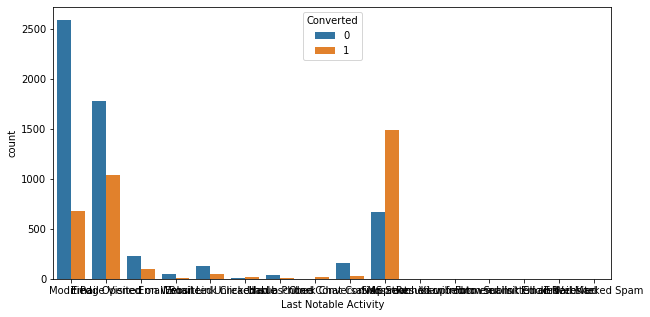

In [90]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_score)

Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for further analysis.

In [91]:
original_lead = lead_score.copy()
original_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [92]:
lead_score = lead_score.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [93]:
lead_score.shape

(9074, 15)

In [94]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Step 3 : Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [95]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_score[varlist] = lead_score[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [96]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_score[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [97]:
# Adding the results to the master dataframe
lead_score = pd.concat([lead_score, dummy1], axis=1)
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0


In [98]:
lead_score = lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [99]:
lead_score.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4 : Test Train Split

In [100]:
# Putting feature variable to X
X = lead_score.drop('Converted', axis=1)

In [101]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [102]:
X.shape

(9074, 85)

In [103]:
# Putting response variable to y
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

## Step 5 : Feature Scaling

In [105]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

print(X_train.head())

      Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
160              0            0    -0.071614                     0.961655   
2267             0            0    -1.147903                    -0.886605   
8895             0            0    -1.147903                    -0.886605   
854              0            0     0.287149                     2.136489   
3640             0            0     0.287149                    -0.505974   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
160               0.405994                                    1   
2267             -1.263716                                    0   
8895             -1.263716                                    0   
854               0.962564                                    1   
3640              0.962564                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
160                           0                        0   
2267          

In [106]:
# Checking the Lead Conversion Rate
Converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% conversion

## Step 6: Model Building

In [107]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7173
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.7
Date:                Mon, 06 Jan 2020   Deviance:                       2909.3
Time:                        21:45:31   Pearson chi2:                 4.75e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.5428   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.1754      0.295     -3.984      0.000      -1.754      -0.597
Do Not Call                                             23.8579   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.2182      0.080      2.741      0.006       0.062       0.374
Total Time Spent on Website                              1.0977      0.058     18.792      0.000       0.983       1.212
Page Views Per Visit                                    -0.3581      0.091     -3.941      0.000      -0.536      -0.180
Lead Origin_Landing Page Submission                     -0.8821      0.204     -4.313      0.000      -1.283      -0.481
Lead Origin_Lead Add Form                               -0.2799      1.282     -0.218      0.827      -2.792       2.232
Lead Origin_Lead Import                                 29.5119   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6980   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.1962      0.143      1.371      0.170      -0.084       0.477
Lead Source_Olark Chat                                   0.8491      0.216      3.927      0.000       0.425       1.273
Lead Source_Organic Search                               0.2686      0.194      1.388      0.165      -0.111       0.648
Lead Source_Others                                       0.6791      0.789      0.860      0.390      -0.868       2.226
Lead Source_Reference                                    1.5762      1.331      1.184      0.236      -1.033       4.186
Lead Source_Referral Sites                              -0.0923      0.435     -0.212      0.832      -0.945       0.761
Lead Source_Welingak Website                             5.3010      1.479      3.584      0.000       2.402       8.200
Last Activity_Email Bounced                             -0.5431      0.735     -0.738      0.460      -1.985       0.898
Last Activity_Email Link Clicked                         0.5653      0.612      0.924      0.356      -0.634       1.765
Last Activity_Email Opened                               0.0606      0.360      0.168      0.866      -0.645       0.766
Last Activity_Form Submitted on Website                  0.2929      0.556      0.527      0.598      -0.796       1.382
Last Activity_Olark Chat Conversation                   -0.5641      0.366     -1.540      0.124      -1.282       0.154
Last Activity_Other_Activity                             1

## Step 7: Feature Selection Using RFE

In [108]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [109]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [110]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 30),
 ('TotalVisits', False, 40),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 63),
 ('Lead Source_Referral Sites', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Form Submitted on Website', False, 53),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 52),
 ('Last Activity_SMS Sent'

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [112]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       '

##### Assessing the model with StatsModels

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1818.1
Date:                Mon, 06 Jan 2020   Deviance:                       3636.1
Time:                        21:45:35   Pearson chi2:                 3.75e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8514      0.200     -9.241      0.000      -2.244      -1.459
Do Not Email                                            -1.2282      0.196     -6.263      0.000      -1.612      -0.844
Lead Origin_Lead Add Form                                0.9994      0.341      2.933      0.003       0.332       1.667
Lead Source_Welingak Website                             3.5422      0.807      4.391      0.000       1.961       5.123
What is your current occupation_Working Professional     1.3192      0.271      4.864      0.000       0.788       1.851
Tags_Busy                                                3.5499      0.310     11.434      0.000       2.941       4.158
Tags_Closed by Horizzon                                  7.8194      0.756     10.346      0.000       6.338       9.301
Tags_Lost to EINS                                        8.6211      0.628     13.736      0.000       7.391       9.851
Tags_Ringing                                            -1.9301      0.311     -6.206      0.000      -2.540      -1.321
Tags_Will revert after reading the email                 3.6794      0.212     17.325      0.000       3.263       4.096
Tags_invalid number                                    -23.3771   2.06e+04     -0.001      0.999   -4.04e+04    4.04e+04
Tags_switched off                                       -2.7245      0.578     -4.717      0.000      -3.856      -1.593
Tags_wrong number given                                -23.0059   2.94e+04     -0.001      0.999   -5.76e+04    5.75e+04
Lead Quality_Not Sure                                   -3.3140      0.119    -27.833      0.000      -3.547      -3.081
Lead Quality_Worst                                      -3.8394      0.759     -5.057      0.000      -5.327      -2.351
Last Notable Activity_SMS Sent                           2.8175      0.114     24.648      0.000       2.593       3.042
========================================================================================================================
"""

In [114]:
col1 = col.drop('Tags_invalid number',1)
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1824.5
Date:                Mon, 06 Jan 2020   Deviance:                       3649.0
Time:                        21:45:35   Pearson chi2:                 3.71e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0027      0.202     -9.906      0.000      -2.399      -1.606
Do Not Email                                            -1.2198      0.196     -6.238      0.000      -1.603      -0.837
Lead Origin_Lead Add Form                                1.0261      0.342      2.999      0.003       0.356       1.697
Lead Source_Welingak Website                             3.5111      0.807      4.351      0.000       1.929       5.093
What is your current occupation_Working Professional     1.3540      0.274      4.944      0.000       0.817       1.891
Tags_Busy                                                3.7183      0.309     12.022      0.000       3.112       4.325
Tags_Closed by Horizzon                                  7.9623      0.756     10.529      0.000       6.480       9.444
Tags_Lost to EINS                                        8.7768      0.629     13.960      0.000       7.545      10.009
Tags_Ringing                                            -1.7474      0.309     -5.648      0.000      -2.354      -1.141
Tags_Will revert after reading the email                 3.8310      0.213     17.950      0.000       3.413       4.249
Tags_switched off                                       -2.5370      0.576     -4.401      0.000      -3.667      -1.407
Tags_wrong number given                                -21.8243   1.78e+04     -0.001      0.999    -3.5e+04    3.49e+04
Lead Quality_Not Sure                                   -3.3080      0.119    -27.825      0.000      -3.541      -3.075
Lead Quality_Worst                                      -3.9144      0.751     -5.210      0.000      -5.387      -2.442
Last Notable Activity_SMS Sent                           2.7778      0.113     24.657      0.000       2.557       2.999
========================================================================================================================
"""

In [116]:
col2 = col1.drop('Tags_wrong number given',1)
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [117]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1826.8
Date:                Mon, 06 Jan 2020   Deviance:                       3653.7
Time:                        21:45:35   Pearson chi2:                 3.72e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0700      0.202    -10.268      0.000      -2.465      -1.675
Do Not Email                                            -1.2217      0.195     -6.258      0.000      -1.604      -0.839
Lead Origin_Lead Add Form                                1.0369      0.343      3.023      0.003       0.365       1.709
Lead Source_Welingak Website                             3.5004      0.807      4.336      0.000       1.918       5.083
What is your current occupation_Working Professional     1.3689      0.275      4.976      0.000       0.830       1.908
Tags_Busy                                                3.7908      0.308     12.301      0.000       3.187       4.395
Tags_Closed by Horizzon                                  8.0269      0.756     10.617      0.000       6.545       9.509
Tags_Lost to EINS                                        8.8416      0.628     14.068      0.000       7.610      10.073
Tags_Ringing                                            -1.6728      0.308     -5.429      0.000      -2.277      -1.069
Tags_Will revert after reading the email                 3.8993      0.213     18.340      0.000       3.483       4.316
Tags_switched off                                       -2.4610      0.576     -4.275      0.000      -3.589      -1.333
Lead Quality_Not Sure                                   -3.3078      0.119    -27.836      0.000      -3.541      -3.075
Lead Quality_Worst                                      -3.8975      0.753     -5.173      0.000      -5.374      -2.421
Last Notable Activity_SMS Sent                           2.7685      0.112     24.665      0.000       2.549       2.989
========================================================================================================================
"""

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

160     0.861689
2267    0.185663
8895    0.990027
854     0.861689
3640    0.185663
7090    0.013626
4366    0.185663
6174    0.002554
857     0.185663
7264    0.185663
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86168877, 0.18566275, 0.99002749, 0.86168877, 0.18566275,
       0.01362609, 0.18566275, 0.00255411, 0.18566275, 0.18566275])

In [120]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,LeadID
0,1,0.861689,160
1,0,0.185663,2267
2,1,0.990027,8895
3,1,0.861689,854
4,0,0.185663,3640


In [121]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted
0,1,0.861689,160,1
1,0,0.185663,2267,0
2,1,0.990027,8895,1
3,1,0.861689,854,1
4,0,0.185663,3640,0


In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4316  179]
 [ 407 2357]]


In [123]:
# Predicted          not_converted    converted
# Actual
# not_converted        4316            179
# converted            407             2357 

In [124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9192726270836203


In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.90
12,Last Notable Activity_SMS Sent,2.90
1,Lead Origin_Lead Add Form,1.61
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.35
3,What is your current occupation_Working Profes...,1.27
5,Tags_Closed by Horizzon,1.16
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values

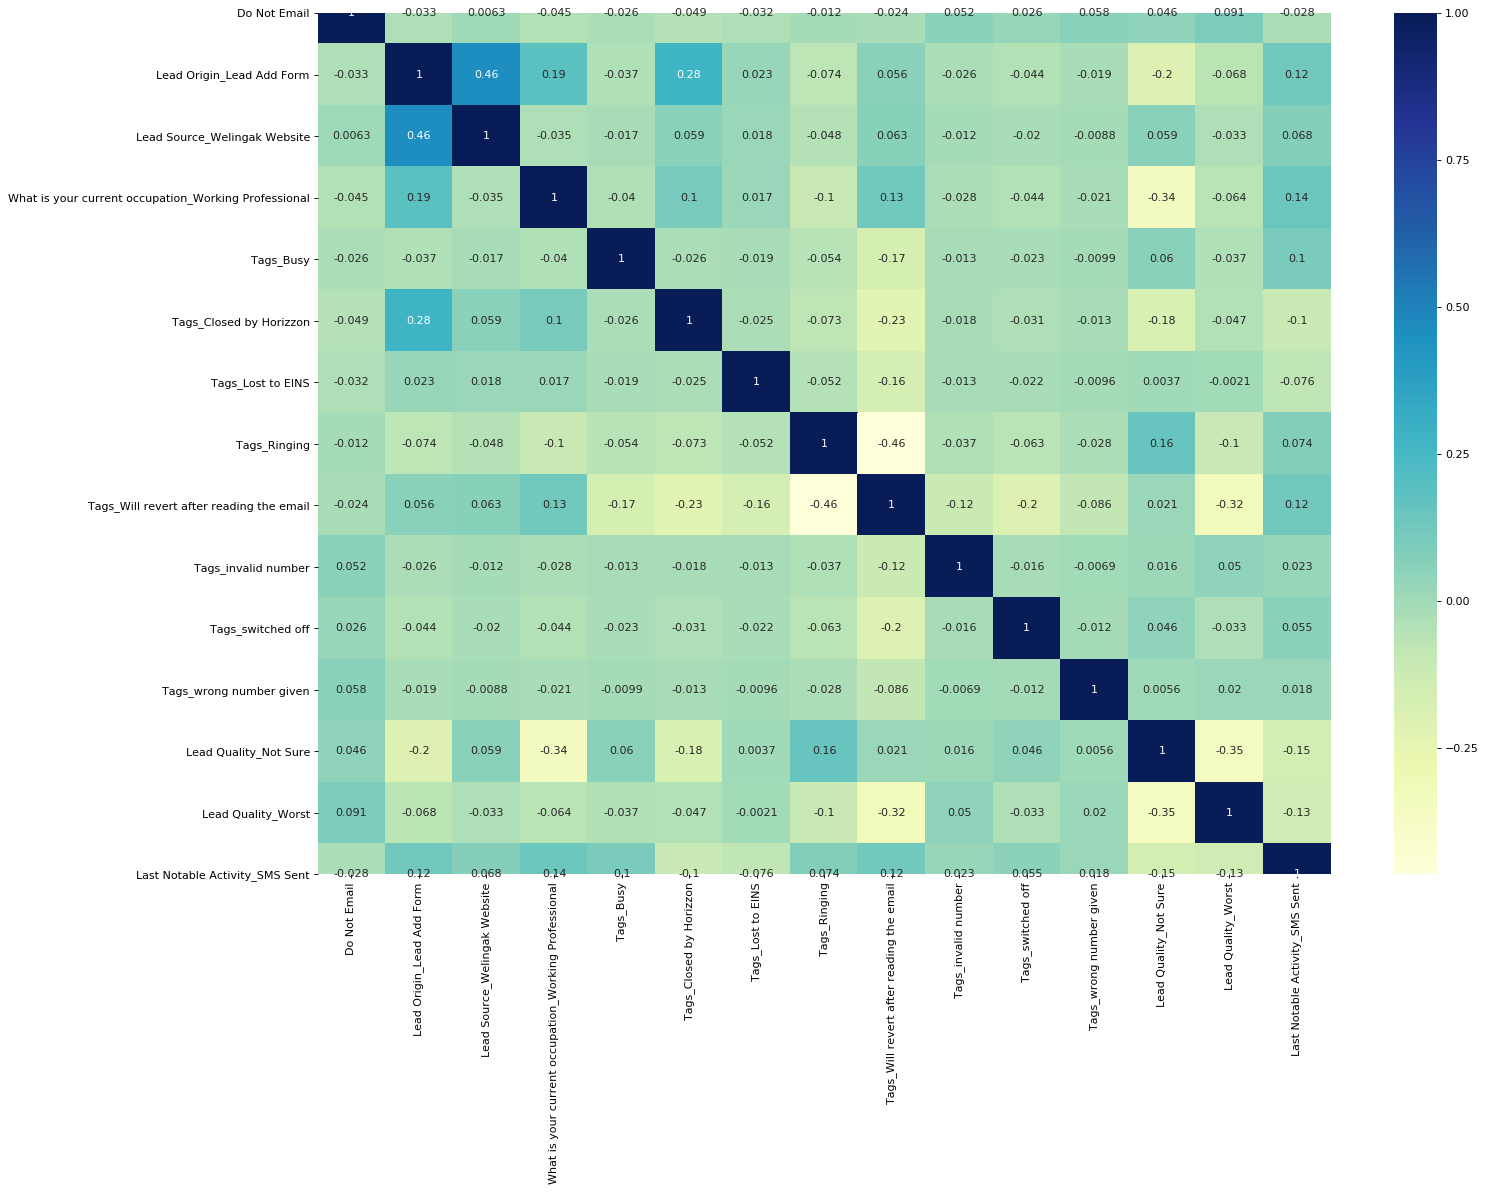

In [126]:
# Let us now check the correlation among the features in the below heat map.¶
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Step 8 : Calculating Metrics beyond Simply Accuracy

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8527496382054993

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9601779755283648

In [130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03982202447163515


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.929416403785489


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9138259580774931


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

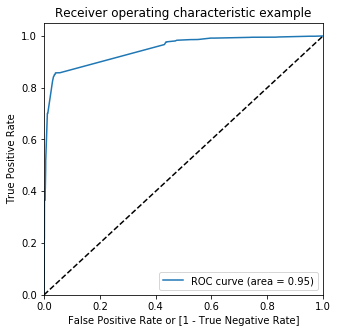

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.861689,160,1,1,1,1,1,1,1,1,1,1,0
1,0,0.185663,2267,0,1,1,0,0,0,0,0,0,0,0
2,1,0.990027,8895,1,1,1,1,1,1,1,1,1,1,1
3,1,0.861689,854,1,1,1,1,1,1,1,1,1,1,0
4,0,0.185663,3640,0,1,1,0,0,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380769  1.000000  0.000000
0.1   0.1  0.701887  0.980463  0.530590
0.2   0.2  0.910043  0.858177  0.941935
0.3   0.3  0.919135  0.857453  0.957063
0.4   0.4  0.919824  0.855282  0.959511
0.5   0.5  0.919273  0.852750  0.960178
0.6   0.6  0.920099  0.849493  0.963515
0.7   0.7  0.919273  0.842981  0.966185
0.8   0.8  0.878082  0.701520  0.986652
0.9   0.9  0.813886  0.520622  0.994216


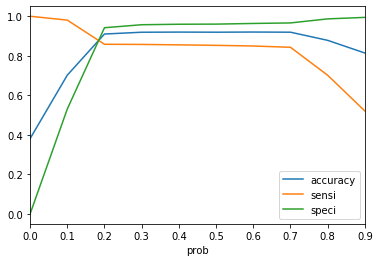

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [139]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.861689,160,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.185663,2267,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.990027,8895,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.861689,854,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.185663,3640,0,1,1,0,0,0,0,0,0,0,0,0


#### Assigning Lead Score

In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.861689,160,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.185663,2267,0,1,1,0,0,0,0,0,0,0,0,0,19
2,1,0.990027,8895,1,1,1,1,1,1,1,1,1,1,1,1,99
3,1,0.861689,854,1,1,1,1,1,1,1,1,1,1,0,1,86
4,0,0.185663,3640,0,1,1,0,0,0,0,0,0,0,0,0,19


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8581765557163531

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9419354838709677

In [144]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05806451612903226


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9008735282947209


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9152615650670125


## Step 11 : Precision and Recall

In [147]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[4316,  179],
       [ 407, 2357]], dtype=int64)

In [148]:
##### Precision
TP / TP + FP

precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.929416403785489

In [149]:
##### Recall
TP / TP + FN

recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8527496382054993

##### Using sklearn utilities for the same

In [150]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.929416403785489

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8527496382054993

#### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 7254    0
 7255    1
 7256    0
 7257    0
 7258    0
 Name: Converted, Length: 7259, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 7254    0
 7255    1
 7256    0
 7257    0
 7258    0
 Name: predicted, Length: 7259, dtype: int64)

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

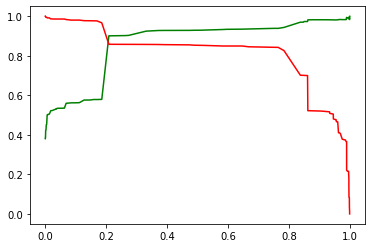

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to .2. However our business requirement here is to have Lead Conversion Rate around 80%.¶
This is already achieved with our earlier threshold value of 0.2. So we will stick to this value

#### Calculating the F1 score

In [155]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8894339622641511

## Step 12 : Making predictions on the test set

In [156]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
160,0,0,-0.071614,0.961655,0.405994,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2267,0,0,-1.147903,-0.886605,-1.263716,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8895,0,0,-1.147903,-0.886605,-1.263716,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
854,0,0,0.287149,2.136489,0.962564,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3640,0,0,0.287149,-0.505974,0.962564,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [159]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.185663
1490    0.960771
7936    0.185663
4216    0.999083
3830    0.185663
1800    0.960771
6507    0.013626
4821    0.000394
4223    0.996441
4714    0.185663
dtype: float64

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
# Let's see the head
y_pred_1.head()

,0
3271,0.185663
1490,0.960771
7936,0.185663
4216,0.999083
3830,0.185663


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
y_pred_final.head()

,Converted,LeadID,0
0,0,3271,0.185663
1,1,1490,0.960771
2,0,7936,0.185663
3,1,4216,0.999083
4,0,3830,0.185663


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [168]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_prob'], axis=1)

In [169]:
y_pred_final.head()

,LeadID,Converted,Converted_prob
0,3271,0,0.185663
1,1490,1,0.960771
2,7936,0,0.185663
3,4216,1,0.999083
4,3830,0,0.185663


Using the probability threshold value 0f 0.2 on the test dataset to predict if a lead will convert

In [170]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [171]:
y_pred_final.head()

,LeadID,Converted,Converted_prob,final_predicted
0,3271,0,0.185663,0
1,1490,1,0.960771,1
2,7936,0,0.185663,0
3,4216,1,0.999083,1
4,3830,0,0.185663,0


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9046831955922865

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1076,   68],
       [ 105,  566]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8435171385991058

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.9405594405594405

In [177]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05944055944055944


In [178]:
# positive predictive value 
print (TP / float(TP+FP))

0.8927444794952681


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9110922946655376


#### Precision and Recall

In [180]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[4316,  179],
       [ 407, 2357]], dtype=int64)

In [181]:
##### Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929416403785489

In [182]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8527496382054993

#### Classification Report

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1144
           1       0.89      0.84      0.87       671

    accuracy                           0.90      1815
   macro avg       0.90      0.89      0.90      1815
weighted avg       0.90      0.90      0.90      1815



#### Cross Validation Score¶
To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [184]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.87086093 0.87555066 0.88105727 0.88436123 0.88546256 0.89305402
 0.8952591  0.89977974 0.91620728 0.93605292]
0.8937645699529666


#### Plotting the ROC Curve for Test Dataset

In [185]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [186]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False )

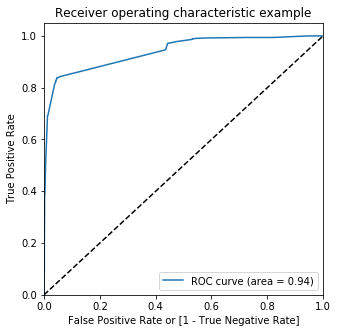

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        8.74125874e-04, 8.74125874e-04, 8.74125874e-04, 8.74125874e-04,
        1.74825175e-03, 1.74825175e-03, 1.74825175e-03, 1.74825175e-03,
        1.74825175e-03, 1.74825175e-03, 1.74825175e-03, 2.62237762e-03,
        4.37062937e-03, 4.37062937e-03, 4.37062937e-03, 5.24475524e-03,
        5.24475524e-03, 5.24475524e-03, 5.24475524e-03, 1.22377622e-02,
        1.39860140e-02, 1.39860140e-02, 3.75874126e-02, 4.19580420e-02,
        4.19580420e-02, 4.28321678e-02, 4.28321678e-02, 4.45804196e-02,
        4.54545455e-02, 4.63286713e-02, 4.63286713e-02, 4.98251748e-02,
        5.94405594e-02, 4.35314685e-01, 4.43181818e-01, 4.45804196e-01,
        4.79020979e-01, 4.80769231e-01, 5.29720280e-01, 5.305944

In [187]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

####  Calculating the Area Under the Curve(GINI)

In [188]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [189]:
auc = auc_val(fpr,tpr)
auc

0.939738074890832

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail
Since we got a value of 0.9397, our model seems to be doing well on the test dataset

## Step 13: Calculating Lead score for the entire dataset

Lead Score = 100 * ConversionProbability¶
This needs to be calculated for all the leads from the original dataset (train + test)

In [190]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Converted_prob,final_predicted
0,3271,0,0.185663,0
1,1490,1,0.960771,1
2,7936,0,0.185663,0
3,4216,1,0.999083,1
4,3830,0,0.185663,0


In [191]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.861689,160,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.185663,2267,0,1,1,0,0,0,0,0,0,0,0,0,19
2,1,0.990027,8895,1,1,1,1,1,1,1,1,1,1,1,1,99
3,1,0.861689,854,1,1,1,1,1,1,1,1,1,1,0,1,86
4,0,0.185663,3640,0,1,1,0,0,0,0,0,0,0,0,0,19


In [192]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Converted_prob,final_predicted
0,160,1,0.861689,1
1,2267,0,0.185663,0
2,8895,1,0.990027,1
3,854,1,0.861689,1
4,3640,0,0.185663,0


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [193]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Converted_prob,final_predicted
0,160,1,0.861689,1
1,2267,0,0.185663,0
2,8895,1,0.990027,1
3,854,1,0.861689,1
4,3640,0,0.185663,0


In [194]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(7259, 4)
(1815, 4)
(9074, 4)


In [195]:
# Ensuring the LeadID are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9074

In [196]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Converted_prob,final_predicted,Lead_Score
0,160,1,0.861689,1,86
1,2267,0,0.185663,0,19
2,8895,1,0.990027,1,99
3,854,1,0.861689,1,86
4,3640,0,0.185663,0,19


In [197]:
# Inspecing the max LeadID
lead_full_pred['LeadID'].max()

9239

In [198]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.112052,0,11
1,0,0.000866,0,0
2,1,0.861689,1,86
3,0,0.000866,0,0
4,1,0.861689,1,86


In [199]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_lead[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


Concatenating the 2 dataframes based on index.
This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [200]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0,0.112052,0,11
1,660728,0,0.000866,0,0
2,660727,1,0.861689,1,86
3,660719,0,0.000866,0,0
4,660681,1,0.861689,1,86
5,660680,0,0.185663,0,19
6,660673,1,0.861689,1,86
7,660664,0,0.185663,0,19
8,660624,0,0.185663,0,19
9,660616,0,0.185663,0,19


In [201]:
# Inspecting the dataframe shape
leads_with_score.shape

(9074, 5)

In [202]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Converted_prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


## Step 14: Determining Feature Importance
Selecting the coefficients of the selected features from our final model excluding the intercept

In [203]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.22
Lead Origin_Lead Add Form                               1.04
Lead Source_Welingak Website                            3.50
What is your current occupation_Working Professional    1.37
Tags_Busy                                               3.79
Tags_Closed by Horizzon                                 8.03
Tags_Lost to EINS                                       8.84
Tags_Ringing                                           -1.67
Tags_Will revert after reading the email                3.90
Tags_switched off                                      -2.46
Lead Quality_Not Sure                                  -3.31
Lead Quality_Worst                                     -3.90
Last Notable Activity_SMS Sent                          2.77
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient.

In [204]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -13.82
Lead Origin_Lead Add Form                               11.73
Lead Source_Welingak Website                            39.59
What is your current occupation_Working Professional    15.48
Tags_Busy                                               42.88
Tags_Closed by Horizzon                                 90.79
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -18.92
Tags_Will revert after reading the email                44.10
Tags_switched off                                      -27.83
Lead Quality_Not Sure                                  -37.41
Lead Quality_Worst                                     -44.08
Last Notable Activity_SMS Sent                          31.31
dtype: float64

Sorting the feature variables based on their relative coefficient values

In [205]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Do Not Email                                            11
Lead Origin_Lead Add Form                               10
Lead Source_Welingak Website                             9
What is your current occupation_Working Professional     7
Tags_Busy                                                0
Tags_Closed by Horizzon                                  1
Tags_Lost to EINS                                        3
Tags_Ringing                                            12
Tags_Will revert after reading the email                 2
Tags_switched off                                        4
Lead Quality_Not Sure                                    8
Lead Quality_Worst                                       5
Last Notable Activity_SMS Sent                           6
dtype: int64

Plot showing the feature variables based on their relative coefficient values.

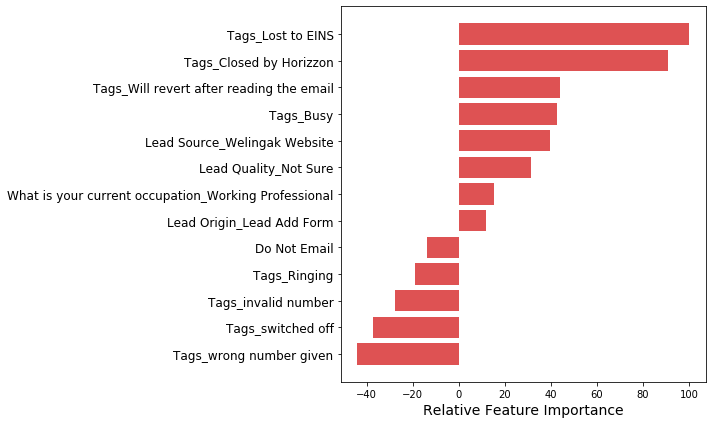

In [206]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

#### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [207]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(15)

,index,0
6,Tags_Lost to EINS,100.00
5,Tags_Closed by Horizzon,90.79
8,Tags_Will revert after reading the email,44.10
4,Tags_Busy,42.88
2,Lead Source_Welingak Website,39.59
12,Last Notable Activity_SMS Sent,31.31
3,What is your current occupation_Working Profes...,15.48
1,Lead Origin_Lead Add Form,11.73
0,Do Not Email,-13.82
7,Tags_Ringing,-18.92


## Step 15: Conclusion

After trying several models, we finally chose a model with the following characteristics:

<font color = blue>All variables have p-value < 0.05. </font><br>
<font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font><br>
<font color = blue>The overall accuracy of 0.904 at a probability threshold of 0.2 on the test dataset is also very acceptable.</font>

#### Using the model, the dependent variable value was predicted as per the following threshold values of Conversion Probability:

| Dataset | ThresholdValue | Accuracy | Sensitivity | Specificity | False Positive Rate | Positive Predictive Value | Negative Predictive value | Precision | Recall | F1 Value | Cross Validation Score | AUC   |
|---------|:--------------:|---------:|-------------|-------------|---------------------|---------------------------|---------------------------|-----------|--------|----------|------------------------|-------|
| Train   |       0.2      |    0.904 | 0.843       | 0.940       | 0.039               | 0.929                     | 0.913                     | 0.929     | 0.852  | 0.874    |                        | 0.948 |
| Test    |       0.2      |     0.90 | 0.834       | 0.940       | 0.05                | 0.89                      | 0.911                     | 0.929     | 0.852  | 0.876    | 0.89                   | 0.939 |

#### Features that contribute most to Lead getting converted successfully.

The Conversion Probability of Lead increases with increase in in values of following features in descending Order:<br>

Features With Positive Coefficient Values:
1. Tags_Lost to EINS
2. Tags_Closed by Horizzon
3. Tags_Will revert after reading the email
4. Lead Source_Welingak Website
5. Last Acitivity_SMS Sent
6. What is your current occupation_Working Professional
7. What is your current occupation_Unemployed.

The Conversion Probability of Lead decreases with decreases in in values of following features in descending Order:<br>

Features with Negative Coefficient Values:
1. Tags_switched off
2. Tags_Ringing
3. Tags_Already a Student
4. Tags_Not doing further education
5. Lead Quality_worst
6. Tags_opp hangup
7. Tags_Interested in full time MBA
8. Tags_Interested in other courses
9. Assymetrique Activity Index_03 Low

## Step 16 : Problem Solution & Recomendations

The top 3 feature contributing most to lead conversion are:<br>
1. Tags_Lost to EINS
2. Tags_Closed by Horizzon
3. Tags_Will revert after reading the email

The top 3 categorical/dummy variables contributing most to lead conversion are:<br>
1. Tags_Lost to EINS
2. Tags_Closed by Horizzon
3. Tags_Will revert after reading the email

The Threshold values for Conversion probability ha to be choosen wisely.Which will inturn effect the sensitivity(lower threshold) and specificity(Higher threshold) there by ensuring that all the leads are converted.